In [1]:
import pandas as pd
from scipy import stats
import datetime as dt
from matplotlib import pyplot as plt
import math
import plotly.graph_objects as px
import plotly.graph_objects as go
import kaleido

In [2]:
def stat_fav(tweets_selection, tweets_all, firm):
    tweets_all['Date-Time'] = tweets_all['Date-Time'].astype('datetime64[ns]')
    tweets_all = tweets_all[tweets_all['Date-Time']>dt.datetime(2019, 1, 1, 0, 0, 0, 0)]
    tweets_notrelevant = tweets_all.drop(tweets_all.index[tweets_selection['Unnamed: 0']])
    t_value, p_value = stats.ttest_ind(tweets_notrelevant['Likes'], tweets_selection['Likes'])
    mean_select = tweets_selection['Likes'].mean()
    mean_notrelevant = tweets_notrelevant['Likes'].mean()


    
    return([mean_select, mean_notrelevant, p_value])
    
def stat_re(tweets_selection, tweets_all, firm):
    tweets_all['Date-Time'] = tweets_all['Date-Time'].astype('datetime64[ns]')
    tweets_all = tweets_all[tweets_all['Date-Time']>dt.datetime(2019, 1, 1, 0, 0, 0, 0)]
    tweets_notrelevant = tweets_all.drop(tweets_all.index[tweets_selection['Unnamed: 0']])
    t_value, p_value = stats.ttest_ind(tweets_notrelevant['Retweets'], tweets_selection['Retweets'])
    mean_select = tweets_selection['Retweets'].mean()
    mean_notrelevant = tweets_notrelevant['Retweets'].mean()


    return([mean_select, mean_notrelevant, p_value])

In [8]:
firms = ['Apple', 'Twitter', 'GeneralMotors', 'Intel', 'Amazon', 'Microsoft', 'Alphabet', 'AMD', 'Accenture']
ceos = ['tim_cook', 'paraga', 'mtbarra', 'PGelsinger', 'ajassy', 'satyanadella', 'sundarpichai',  'lisasu', 'juliesweet']

mean_rel = []
mean_ir = []
p_values = []


for firm, ceo in zip(firms, ceos):
    tweets_select = pd.read_csv(f'final_tweets/{firm}_final.csv')
    tweets_all = pd.read_csv(f'twitter_data/{ceo}_tweets.csv')
    results = stat_fav(tweets_select, tweets_all, firm)
    mean_rel.append(results[0])
    mean_ir.append(results[1])
    p_values.append(results[2])
    
norm_rel = []
norm_ir = []

for rel, ir in zip(mean_rel, mean_ir):
    if rel > ir:
        norm_rel.append(1)
        norm_ir.append(ir/rel)
    else:
        norm_rel.append(rel/ir)
        norm_ir.append(1)
firm_labels = ['Apple***', 'Twitter***', 'GeneralMotors', 'Intel', 'Amazon', 'Microsoft', 'Alphabet*', 'AMD', 'Accenture***']

fig = go.Figure(data=[
    go.Bar(name='Mean Relevant', x=firm_labels, y=norm_rel),
    go.Bar(name='Mean Irrelevant', x=firm_labels, y=norm_ir,)
])


fig.update_layout(barmode='group', title = 'Normalized mean amount of likes per tweet <br><sup>p-value: *<0.05, **<0.01, ***<0.001</sup>')
fig.show()
fig.write_image("vis/mean_likes.png")

In [9]:
firms = ['Apple', 'Twitter', 'GeneralMotors', 'Intel', 'Amazon', 'Microsoft', 'Alphabet', 'AMD', 'Accenture']
ceos = ['tim_cook', 'paraga', 'mtbarra', 'PGelsinger', 'ajassy', 'satyanadella', 'sundarpichai',  'lisasu', 'juliesweet']

mean_rel = []
mean_ir = []
p_values = []


for firm, ceo in zip(firms, ceos):
    tweets_select = pd.read_csv(f'final_tweets/{firm}_final.csv')
    tweets_all = pd.read_csv(f'twitter_data/{ceo}_tweets.csv')
    results = stat_re(tweets_select, tweets_all, firm)
    mean_rel.append(results[0])
    mean_ir.append(results[1])
    p_values.append(results[2])
    
norm_rel = []
norm_ir = []

for rel, ir in zip(mean_rel, mean_ir):
    if rel > ir:
        norm_rel.append(1)
        norm_ir.append(ir/rel)
    else:
        norm_rel.append(rel/ir)
        norm_ir.append(1)
firm_labels = ['Apple***', 'Twitter', 'GeneralMotors', 'Intel', 'Amazon', 'Microsoft', 'Alphabet**', 'AMD', 'Accenture*']

fig = go.Figure(data=[
    go.Bar(name='Mean Relevant', x=firm_labels, y=norm_rel),
    go.Bar(name='Mean Irrelevant', x=firm_labels, y=norm_ir,)
])


fig.update_layout(barmode='group', title = 'Normalized mean amount of retweets per tweet <br><sup>p-value: *<0.05, **<0.01, ***<0.001</sup>')
fig.show()

fig.write_image("vis/mean_retweets.png")

In [12]:
### Korrelation Fluktuation und Likes/Retweets

In [32]:
df = pd.read_csv('final_tweets/Apple_final.csv')
df['daily fluc'] = abs(df['daily fluc'])

df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Likes,Retweets,Date-Time,Date,daily fluc
0,0,0,Eid Mubarak to everyone celebrating around the...,69778,7060,2022-05-01 23:11:44+00:00,2022-05-01,3.694542
1,29,29,Celebrating incredible writer/director @sianhe...,4121,251,2022-03-12 21:20:57+00:00,2022-03-12,3.046720
2,30,30,As the east coast of Australia contends with t...,6778,432,2022-03-12 02:21:56+00:00,2022-03-12,3.046720
3,31,31,.@Malala’s episode of Time to Walk on Fitness+...,2660,277,2022-03-12 00:22:27+00:00,2022-03-12,3.046720
4,36,36,Marking Steve’s birthday never gets any easier...,23289,2140,2022-02-25 01:00:06+00:00,2022-02-25,3.538188


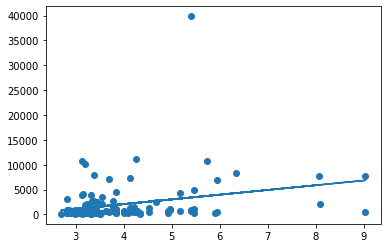

0.003178120113778795


In [33]:
slope, intercept, r, p, std_err = stats.linregress(df['daily fluc'], df['Retweets'])

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, df['daily fluc']))

plt.scatter(df['daily fluc'], df['Retweets'])
plt.plot(df['daily fluc'], mymodel)
plt.show()
print(p)